$$ \text{ANALYSIS OF A SINGLE TIKTOK PROFILE USING WEB-SCRAPED DATA} $$

$$ \underline{Example: \space{} @therock} $$

In [1]:
from profile_scrape import *
import matplotlib.pyplot as plt
import numpy as np
from Functions.corrolation_coefficient import *

In [2]:
N = 20
profile = Profile("therock",N)
profile.get_information()
profile.quit()

$$ \underline{Likes \space{} Against \space{} N \space{} Videos} $$

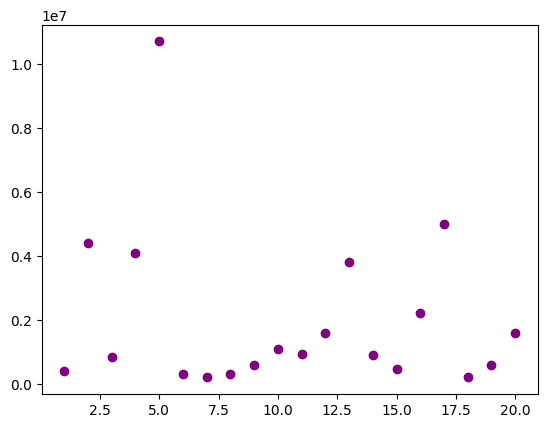

In [3]:
from matplotlib.markers import MarkerStyle

likes = np.array(profile.likes)

likes_flipped = np.flip(likes)

x = np.linspace(1,len(likes),len(likes))

plt.scatter(x,likes_flipped,color="purple")


for a growing profile one would expect to see an increase, since the rock is already a celeb this is what we'd expect to see. a generallly flat curve with a few viral videos

$$\underline{Correlation}$$

Likes vs Comments
correlation:  0.8954570622177691


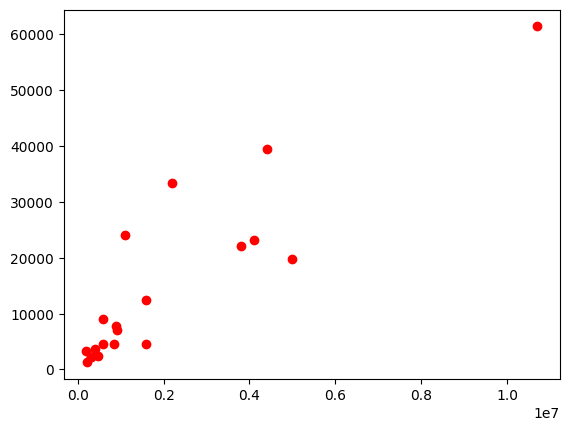

Likes vs Shares
correlation:  0.693064061472312


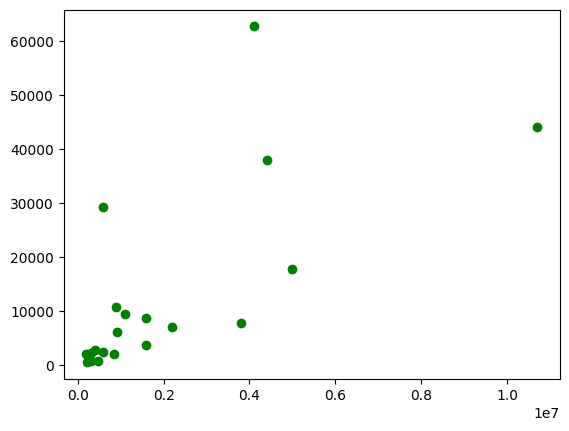

Comments vs Shares
correlation:  0.666971369417334


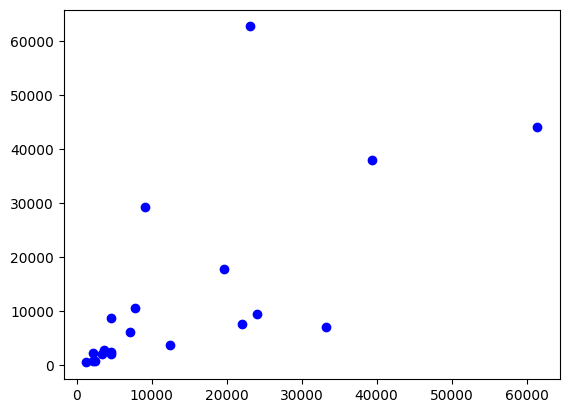

In [4]:
from statistics import correlation


comments = np.array(profile.comments)
shares = np.array(profile.shares)

like_comment_correlation = cor_co(likes,comments)
like_shares_correlation = cor_co(likes,shares)
comments_share_correlation = cor_co(comments,shares)


print("Likes vs Comments")
print("correlation: ",like_comment_correlation)
plt.scatter(likes,comments,color="red")
plt.show()

print("Likes vs Shares")
print("correlation: ",like_shares_correlation)
plt.scatter(likes,shares,color="green")
plt.show()


print("Comments vs Shares")
print("correlation: ",comments_share_correlation)
plt.scatter(comments,shares,color="blue")
plt.show()

we see correlation is high between all values as expected. However, when shares are present the correlation is reduced. Showing when a user shares a video they are not necessarily liking and commenting

$$ \underline{Duration} $$ 

Another interesting value when it comes to tiktoks is duration. Let's look at the correlation between duration and all other interactions

Likes vs Duration
correlation:  0.08044870623902664


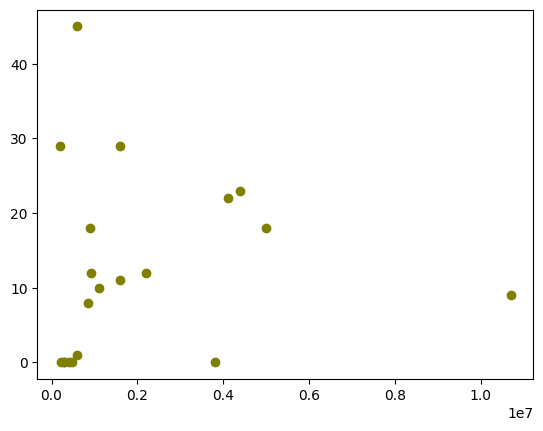

Comments vs Duration
correlation:  0.10345064297210926


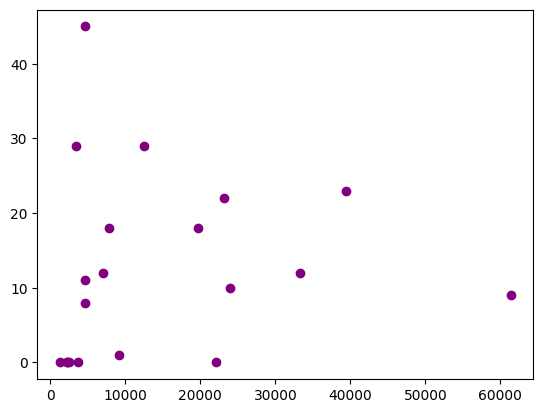

Shares vs Duration
correlation:  0.15469596067926175


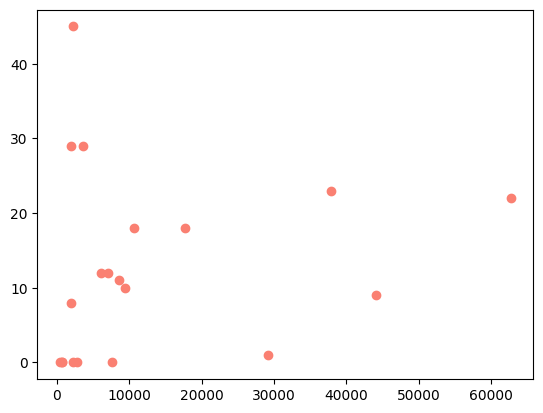

Total Interactions vs Duration
correlation:  0.08129813112291938


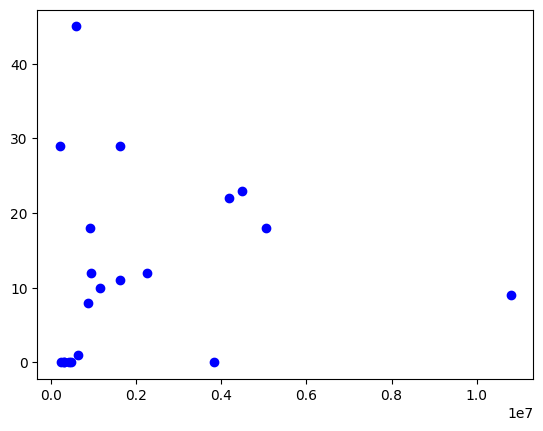

In [6]:
duration = np.array(profile.duration)

total_interactions = likes + comments + shares

like_duration_correlation = cor_co(likes,duration)
comment_duration_correlation = cor_co(comments,duration)
shares_duration_correlation = cor_co(shares,duration)
tot_interaction_duration_correlation = cor_co((total_interactions),duration)

print("Likes vs Duration")
print("correlation: ",like_duration_correlation)
plt.scatter(likes,duration,color="olive")
plt.show()

print("Comments vs Duration")
print("correlation: ",comment_duration_correlation)
plt.scatter(comments,duration,color="purple")
plt.show()


print("Shares vs Duration")
print("correlation: ",shares_duration_correlation)
plt.scatter(shares,duration,color="salmon")
plt.show()


print("Total Interactions vs Duration")
print("correlation: ",tot_interaction_duration_correlation)
plt.scatter(total_interactions,duration,color="blue")
plt.show()

Here we can see no correlation in all cases. This is a common misconception when it comes to tiktoks. A longer doesn't always lead to a more viral video. Altough watch time may (remember you can repeatedly watch the same tiktok.)

$$ \underline{Averages} $$

The mean of a each our lists can easily be calculated using numpy. Using this mean and standard deviation i can remove outliers and make an approximation of how many interactions an average post will recieve. 

I am just going to do this for likes

In [7]:
mean_likes = likes.mean()
std_likes = likes.std()

likes_altered = []
for i in likes:
    if i < mean_likes + std_likes*2:
        likes_altered.append(i)

likes_altered = np.array(likes_altered)
expected_likes = likes_altered.mean()

print("Original mean: ",mean_likes)
print("Expected likes: ",expected_likes)

Original mean:  2010420.0
Expected likes:  1553073.6842105263


I have written a function for this in exepected_interactions.py using that below

In [16]:
from expected_interactions import *

print("Profile username: ",profile.username)
print("============================================")
print("total followers: ",profile.followers)
print("==================================================================")
print("Given a posted tiktok, expect the following number of interactions:")

print("     -likes:", expected_interactions(likes))
print("     -comments:", expected_interactions(comments))
print("     -shares:", expected_interactions(shares))


Profile username:  @therock
total followers:  62900000.0
Given a posted tiktok, expect the following number of interactions:
     -likes: 1553073.6842105263
     -comments: 11952.894736842105
     -shares: 10249.052631578947
